In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

### Enhance images using CLAHE

#### Train dataset

In [16]:
classes = ['0', '1', '2', '3', '4']


for cl in classes:
    folder_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/train/" + cl
    print(folder_dir)
    count = 0
    for images in os.listdir(folder_dir):
        # print(folder_dir + "/" + images)
        img = cv2.imread(folder_dir + "/" + images)
        imgResize = cv2.resize(img, (176, 176))

        #image is converted to grayscale
        #CLAHE can be applied to RGB images also by applying it on all the three components individually
        #the result of the full RGB can be obtained by combining the individual components
        image_bw = cv2.cvtColor(imgResize, cv2.COLOR_BGR2GRAY)

        # The declaration of CLAHE
        # clipLimit -> Threshold for contrast limiting
        # tileGridSize -> Number of tiles in the row and column
        clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(6, 6))
        final_img = clahe.apply(image_bw)

        target_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/train/" + cl + "/" + images
        # print(target_dir)
        cv2.imwrite(target_dir, final_img)
        count += 1
    print(count)

C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/train/0
2286
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/train/1
1046
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/train/2
1516
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/train/3
757
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/train/4
173


#### Validation dataset

In [17]:
classes = ['0', '1', '2', '3', '4']


for cl in classes:
    folder_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/val/" + cl
    print(folder_dir)
    count = 0
    for images in os.listdir(folder_dir):
        # print(folder_dir + "/" + images)
        img = cv2.imread(folder_dir + "/" + images)
        imgResize = cv2.resize(img, (176, 176))

        #image is converted to grayscale
        #CLAHE can be applied to RGB images also by applying it on all the three components individually
        #the result of the full RGB can be obtained by combining the individual components
        image_bw = cv2.cvtColor(imgResize, cv2.COLOR_BGR2GRAY)

        # The declaration of CLAHE
        # clipLimit -> Threshold for contrast limiting
        # tileGridSize -> Number of tiles in the row and column
        clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(6, 6))
        final_img = clahe.apply(image_bw)

        target_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/val/" + cl + "/" + images
        # print(target_dir)
        cv2.imwrite(target_dir, final_img)
        count += 1
    print(count)

C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/val/0
328
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/val/1
153
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/val/2
212
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/val/3
106
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/val/4
27


#### Test dataset

In [18]:
classes = ['0', '1', '2', '3', '4']


for cl in classes:
    folder_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/test/" + cl
    print(folder_dir)
    count = 0
    for images in os.listdir(folder_dir):
        # print(folder_dir + "/" + images)
        img = cv2.imread(folder_dir + "/" + images)
        imgResize = cv2.resize(img, (176, 176))

        #image is converted to grayscale
        #CLAHE can be applied to RGB images also by applying it on all the three components individually
        #the result of the full RGB can be obtained by combining the individual components
        image_bw = cv2.cvtColor(imgResize, cv2.COLOR_BGR2GRAY)

        # The declaration of CLAHE
        # clipLimit -> Threshold for contrast limiting
        # tileGridSize -> Number of tiles in the row and column
        clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(6, 6))
        final_img = clahe.apply(image_bw)

        target_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/test/" + cl + "/" + images
        # print(target_dir)
        cv2.imwrite(target_dir, final_img)
        count += 1
    print(count)

C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/test/0
639
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/test/1
296
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/test/2
447
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/test/3
223
C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/test/4
51


### Calculate PSNR

In [6]:
from math import log10, sqrt 
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

In [479]:
PSNR(image_bw, final_img)

29.50388683055172

In [16]:
i = cv2.imread("C:/Users/dell/Documents/VIT/Capstone/Dataset/Original/train/0/9001695L.png")
i = cv2.resize(i,(176,176))
print(i.shape)

n = cv2.imread("C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/train/0/9001695L.png")
print(n.shape)

(176, 176, 3)
(176, 176, 3)


In [3]:
def findPSNR_dir(org_img_dir, new_img_dir):
    org_imgs = []
    new_imgs = []

    for img in os.listdir(org_img_dir):
        # oim = cv2.imread(org_img_dir + "/" + img)
        org_imgs.append(org_img_dir + "/" + img)

    for img in os.listdir(new_img_dir):
        # nim = cv2.imread(new_img_dir + "/" + img)
        new_imgs.append(new_img_dir + "/" + img)

    psnr_values = []

    for i in range(len(org_imgs)):
        orgImg = cv2.imread(org_imgs[i])
        newImg = cv2.imread(new_imgs[i])
        orgImg = cv2.resize(orgImg, (176,176))
        psnr_values.append(PSNR(orgImg, newImg))
    
    return psnr_values

In [8]:
def cal_PSNR_avg(psnr_vals):
    psnr_avg = 0

    for val in psnr_vals:
        psnr_avg += val

    psnr_avg /= len(psnr_vals)

    return psnr_avg

#### For training data

In [7]:
#for class 0
org_img_dir_class0 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/train/0"
new_img_dir_class0 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/train/0"

psnr_class0 = findPSNR_dir(org_img_dir_class0, new_img_dir_class0)
print("Class 0", len(psnr_class0))


#for class 1 
org_img_dir_class1 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/train/1"
new_img_dir_class1 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/train/1"

psnr_class1 = findPSNR_dir(org_img_dir_class1, new_img_dir_class1)
print("Class 1", len(psnr_class1))


#for class 2
org_img_dir_class2 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/train/2"
new_img_dir_class2 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/train/2"

psnr_class2 = findPSNR_dir(org_img_dir_class2, new_img_dir_class2)
print("Class 2", len(psnr_class2))


#for class 3
org_img_dir_class3 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/train/3"
new_img_dir_class3 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/train/3"

psnr_class3 = findPSNR_dir(org_img_dir_class3, new_img_dir_class3)
print("Class 3", len(psnr_class3))


#for class 4
org_img_dir_class4 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/train/4"
new_img_dir_class4 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/train/4"

psnr_class4 = findPSNR_dir(org_img_dir_class4, new_img_dir_class4)
print("Class 4", len(psnr_class4))

Class 0 2286
Class 1 1046
Class 2 1516
Class 3 757
Class 4 173


In [10]:
print("PSNR Average Values for Training Data:")

print("Class 0 : ", cal_PSNR_avg(psnr_class0))
print("Class 1 : ", cal_PSNR_avg(psnr_class1))
print("Class 2 : ", cal_PSNR_avg(psnr_class2))
print("Class 3 : ", cal_PSNR_avg(psnr_class3))
print("Class 4 : ", cal_PSNR_avg(psnr_class4))

PSNR Average Values for Training Data:
Class 0 :  29.334148265728146
Class 1 :  29.33678043655512
Class 2 :  29.32868881651487
Class 3 :  29.402474257194264
Class 4 :  29.400820655406818


#### For validation data

In [15]:
print("Validation Data: ")
#for class 0
org_img_dir_class0 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/val/0"
new_img_dir_class0 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/val/0"

psnr_class0_val = findPSNR_dir(org_img_dir_class0, new_img_dir_class0)
print("Class 0", len(psnr_class0_val))


#for class 1 
org_img_dir_class1 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/val/1"
new_img_dir_class1 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/val/1"

psnr_class1_val = findPSNR_dir(org_img_dir_class1, new_img_dir_class1)
print("Class 1", len(psnr_class1_val))


#for class 2
org_img_dir_class2 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/val/2"
new_img_dir_class2 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/val/2"

psnr_class2_val = findPSNR_dir(org_img_dir_class2, new_img_dir_class2)
print("Class 2", len(psnr_class2_val))


#for class 3
org_img_dir_class3 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/val/3"
new_img_dir_class3 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/val/3"

psnr_class3_val = findPSNR_dir(org_img_dir_class3, new_img_dir_class3)
print("Class 3", len(psnr_class3_val))


#for class 4
org_img_dir_class4 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/val/4"
new_img_dir_class4 = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/val/4"

psnr_class4_val = findPSNR_dir(org_img_dir_class4, new_img_dir_class4)
print("Class 4", len(psnr_class4_val))

Validation Data: 
Class 0 328
Class 1 153
Class 2 212
Class 3 106
Class 4 27


In [17]:
print("PSNR Average Values for Validation Data:")

print("Class 0 : ", cal_PSNR_avg(psnr_class0_val))
print("Class 1 : ", cal_PSNR_avg(psnr_class1_val))
print("Class 2 : ", cal_PSNR_avg(psnr_class2_val))
print("Class 3 : ", cal_PSNR_avg(psnr_class3_val))
print("Class 4 : ", cal_PSNR_avg(psnr_class4_val))

PSNR Average Values for Validation Data:
Class 0 :  29.39797722970065
Class 1 :  29.389291094154313
Class 2 :  29.334343780053416
Class 3 :  29.37759310584884
Class 4 :  29.44038490367822


#### For testing data

In [16]:
print("Testing Data: ")
#for class 0
org_img_dir_class0_test = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/test/0"
new_img_dir_class0_test = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/test/0"

psnr_class0_test = findPSNR_dir(org_img_dir_class0_test, new_img_dir_class0_test)
print("Class 0", len(psnr_class0_test))


#for class 1 
org_img_dir_class1_test = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/test/1"
new_img_dir_class1_test = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/test/1"

psnr_class1_test = findPSNR_dir(org_img_dir_class1_test, new_img_dir_class1_test)
print("Class 1", len(psnr_class1_test))


#for class 2
org_img_dir_class2_test = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/test/2"
new_img_dir_class2_test = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/test/2"

psnr_class2_test = findPSNR_dir(org_img_dir_class2_test, new_img_dir_class2_test)
print("Class 2", len(psnr_class2_test))


#for class 3
org_img_dir_class3_test = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/test/3"
new_img_dir_class3_test = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/test/3"

psnr_class3_test = findPSNR_dir(org_img_dir_class3_test, new_img_dir_class3_test)
print("Class 3", len(psnr_class3_test))


#for class 4
org_img_dir_class4_test = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/test/4"
new_img_dir_class4_test = "C:/Users/dell/Documents/VIT/Capstone/Dataset_old/CLAHE/test/4"

psnr_class4_test = findPSNR_dir(org_img_dir_class4_test, new_img_dir_class4_test)
print("Class 4", len(psnr_class4_test))

Testing Data: 
Class 0 639
Class 1 296
Class 2 447
Class 3 223
Class 4 51


In [18]:
print("PSNR Average Values for Testing Data:")

print("Class 0 : ", cal_PSNR_avg(psnr_class0_test))
print("Class 1 : ", cal_PSNR_avg(psnr_class1_test))
print("Class 2 : ", cal_PSNR_avg(psnr_class2_test))
print("Class 3 : ", cal_PSNR_avg(psnr_class3_test))
print("Class 4 : ", cal_PSNR_avg(psnr_class4_test))

PSNR Average Values for Testing Data:
Class 0 :  29.371825752580367
Class 1 :  29.250153512887856
Class 2 :  29.367620353398614
Class 3 :  29.355637783905244
Class 4 :  29.441236801652003


### Cropping the Image

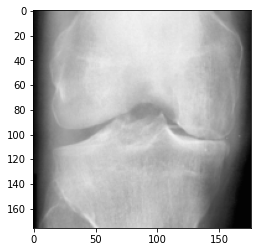

In [36]:
img = cv2.imread("C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/train/4/9160801R.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

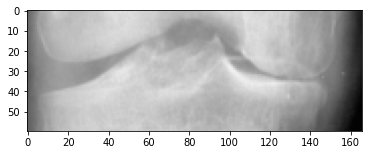

In [37]:
cropped_img = img[70:130,10:180]
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

(224, 224)


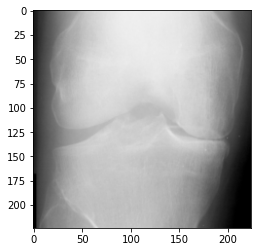

In [21]:
img = cv2.imread("C:/Users/dell/Documents/VIT/Capstone/Dataset_old/Original/train/4/9160801R.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(img.shape)

In [38]:
## for train data

classes = ['0', '1', '2', '3', '4']


for cl in classes:
    folder_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/train/" + cl
    print(folder_dir)
    count = 0
    for images in os.listdir(folder_dir):
        # print(folder_dir + "/" + images)
        img = cv2.imread(folder_dir + "/" + images)
        imgResize = cv2.resize(img, (176, 176))

        # crop image
        cropped_img = img[70:130,10:180]

        target_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/Cropped/train/" + cl + "/" + images
        # print(target_dir)
        cv2.imwrite(target_dir, cropped_img)
        count += 1
    print(count)

C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/train/0
2286
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/train/1
1046
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/train/2
1516
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/train/3
757
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/train/4
173


In [39]:
## for validation data

classes = ['0', '1', '2', '3', '4']


for cl in classes:
    folder_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/val/" + cl
    print(folder_dir)
    count = 0
    for images in os.listdir(folder_dir):
        # print(folder_dir + "/" + images)
        img = cv2.imread(folder_dir + "/" + images)
        imgResize = cv2.resize(img, (176, 176))

        # crop image
        cropped_img = img[70:130,10:180]

        target_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/Cropped/val/" + cl + "/" + images
        # print(target_dir)
        cv2.imwrite(target_dir, cropped_img)
        count += 1
    print(count)

C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/val/0
328
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/val/1
153
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/val/2
212
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/val/3
106
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/val/4
27


In [40]:
## for test data

classes = ['0', '1', '2', '3', '4']


for cl in classes:
    folder_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/test/" + cl
    print(folder_dir)
    count = 0
    for images in os.listdir(folder_dir):
        # print(folder_dir + "/" + images)
        img = cv2.imread(folder_dir + "/" + images)
        imgResize = cv2.resize(img, (176, 176))

        # crop image
        cropped_img = img[70:130,10:180]

        target_dir = "C:/Users/dell/Documents/VIT/Capstone/Dataset/Cropped/test/" + cl + "/" + images
        # print(target_dir)
        cv2.imwrite(target_dir, cropped_img)
        count += 1
    print(count)

C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/test/0
639
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/test/1
296
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/test/2
447
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/test/3
223
C:/Users/dell/Documents/VIT/Capstone/Dataset/CLAHE/test/4
51
